In [140]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Loading Iris dataset

## Feature descriptions

#### The columns in this dataset are:
##### Id
##### SepalLengthCm
##### SepalWidthCm
##### PetalLengthCm
##### PetalWidthCm
##### Species

In [141]:
df_iris = pd.read_csv('iris_dataset_missing.csv')
df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
11,4.994071,2.981724,1.274323,0.333494,Iris-setosa
41,4.496342,3.098270,NaN,0.242853,Iris-setosa
64,6.340344,NaN,4.302989,1.331797,Iris-versicolor
29,5.436127,2.594504,4.023768,1.403453,Iris-versicolor
12,5.131239,3.068165,1.474050,0.156817,Iris-setosa


In [142]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


In [143]:
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor
5,6.707485,3.093846,5.048317,2.373470,Iris-virginica
6,4.811740,3.037915,1.494268,-0.042428,Iris-setosa
7,5.205868,NaN,1.675654,0.112269,Iris-setosa
8,4.436832,2.867772,1.428415,0.385249,Iris-setosa
9,6.847619,3.132270,5.878479,2.166297,Iris-virginica


In [144]:
df_iris.shape

(105, 5)

In [145]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [146]:
#display basic information about the data type
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   101 non-null    float64
 2   petal_length  97 non-null     float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.2+ KB


In [147]:
#display number of samples of each class
df_iris['species'].value_counts()

Iris-virginica     35
Iris-setosa        35
Iris-versicolor    35
Name: species, dtype: int64

# Preprocessing / cleaning the Iris data set

In [148]:
#checking for null values
df_iris.isnull().sum()

sepal_length    0
sepal_width     4
petal_length    8
petal_width     0
species         0
dtype: int64

In [149]:
#dropping rows that have all values missing
df_iris.dropna(how='all').shape

(105, 5)

In [150]:
#dropping rows that have both sepal_width and petal_length missing
df_iris.dropna(subset=['sepal_width', 'petal_length'], how='all').shape

(105, 5)

In [151]:
#filling the missing values with the mean values for sepal_width and petal_length for each species
# df_iris.fillna(df_iris.mean(), inplace = True)
df_iris_clean = df_iris.copy(deep=True)
df_iris_clean['sepal_width']= df_iris['sepal_width'].fillna(df_iris.groupby('species')['sepal_width'].transform('mean'))
df_iris_clean['petal_length']= df_iris['petal_length'].fillna(df_iris.groupby('species')['petal_length'].transform('mean'))

In [152]:
df_iris_clean.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor
5,6.707485,3.093846,5.048317,2.373470,Iris-virginica
6,4.811740,3.037915,1.494268,-0.042428,Iris-setosa
7,5.205868,3.383549,1.675654,0.112269,Iris-setosa
8,4.436832,2.867772,1.428415,0.385249,Iris-setosa
9,6.847619,3.132270,5.878479,2.166297,Iris-virginica


# Normalization of Iris Data

In [153]:
# Creating a copy of Iris dataframe for normalization
nzd_iris_data = df_iris_clean.copy(deep=True)

In [154]:
nzd_iris_data['MinMaxsl']= (nzd_iris_data.sepal_length - nzd_iris_data.sepal_length.min())/(nzd_iris_data.sepal_length.max() - nzd_iris_data.sepal_length.min())
nzd_iris_data['MinMaxsw']= (nzd_iris_data.sepal_width - nzd_iris_data.sepal_width.min())/(nzd_iris_data.sepal_width.max() - nzd_iris_data.sepal_width.min())
nzd_iris_data['MinMaxpl']= (nzd_iris_data.petal_length - nzd_iris_data.petal_length.min())/(nzd_iris_data.petal_length.max() - nzd_iris_data.petal_length.min())
nzd_iris_data['MinMaxpw']= (nzd_iris_data.petal_width - nzd_iris_data.petal_width.min())/(nzd_iris_data.petal_width.max() - nzd_iris_data.petal_width.min())
nzd_iris_data['Zscoresl']= (nzd_iris_data.sepal_length - nzd_iris_data.sepal_length.mean())/nzd_iris_data.sepal_length.std()
nzd_iris_data['Zscoresw']= (nzd_iris_data.sepal_width - nzd_iris_data.sepal_width.mean())/nzd_iris_data.sepal_width.std()
nzd_iris_data['Zscorepl']= (nzd_iris_data.petal_length - nzd_iris_data.petal_length.mean())/nzd_iris_data.petal_length.std()
nzd_iris_data['Zscorepw']= (nzd_iris_data.petal_length - nzd_iris_data.petal_width.mean())/nzd_iris_data.petal_width.std()
nzd_iris_data


,sepal_length,sepal_width,petal_length,petal_width,species,MinMaxsl,MinMaxsw,MinMaxpl,MinMaxpw,Zscoresl,Zscoresw,Zscorepl,Zscorepw
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor,0.203115,0.228204,0.346084,0.462421,-0.944525,-1.219437,-0.439418,2.309874
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor,0.574092,0.068791,0.611799,0.555392,0.541536,-2.093435,0.408884,4.245903
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa,0.264660,0.758373,0.076301,0.174764,-0.697987,1.687273,-1.300709,0.344200
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica,0.675395,0.509707,0.828588,0.910157,0.947335,0.323932,1.100988,5.825452
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor,0.362512,0.297195,0.530848,0.538801,-0.306013,-0.841186,0.150445,3.656083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,4.874848,3.217348,1.592887,0.123588,Iris-setosa,0.153798,0.516058,0.097611,0.073184,-1.142082,0.358756,-1.232675,0.499469
101,5.564197,2.771731,3.483588,1.074754,Iris-versicolor,0.353519,0.335175,0.427255,0.428717,-0.342037,-0.632959,-0.180277,2.901297
102,5.548047,4.249211,1.453466,0.214527,Iris-setosa,0.348840,0.934910,0.073303,0.107176,-0.360780,2.655155,-1.310280,0.322357
103,5.510482,2.652867,4.276817,1.298032,Iris-versicolor,0.337957,0.286926,0.565555,0.512175,-0.404377,-0.897489,0.261249,3.908965


# Exploratory Data Analysis for Iris Data

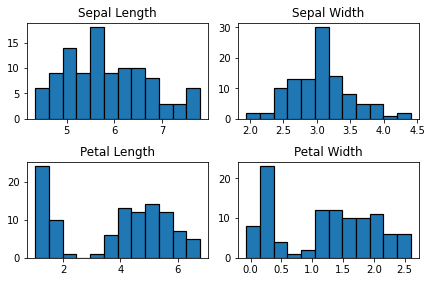

In [155]:
#histograms
n_bins = 12
fig, axes = plt.subplots(2, 2)
axes[0,0].hist(df_iris_clean['sepal_length'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,0].set_title('Sepal Length')
axes[0,1].hist(df_iris_clean['sepal_width'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,1].set_title('Sepal Width')
axes[1,0].hist(df_iris_clean['petal_length'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,0].set_title('Petal Length')
axes[1,1].hist(df_iris_clean['petal_width'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,1].set_title('Petal Width')

# adding some padding / spacing between subplots
fig.tight_layout(pad=1.0)

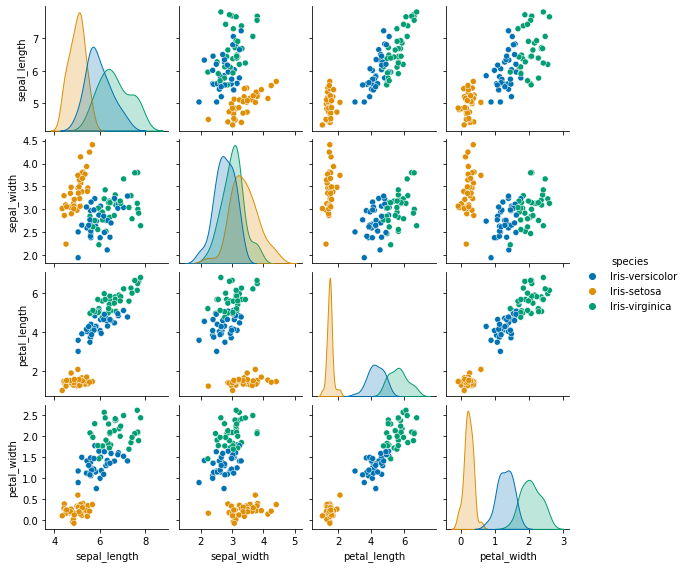

In [156]:
#Making scatter plots of all the paired features by using seaborn's pairplot function:
sns.pairplot(df_iris_clean, hue="species", height = 2, palette = 'colorblind')

# Correlation matrix for Iris Data

In [157]:
#Correlation of Iris data without cleaning
df_iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.031792,0.880635,0.809915
sepal_width,-0.031792,1.000000,-0.285793,-0.267574
petal_length,0.880635,-0.285793,1.000000,0.958274
petal_width,0.809915,-0.267574,0.958274,1.000000


<AxesSubplot:>

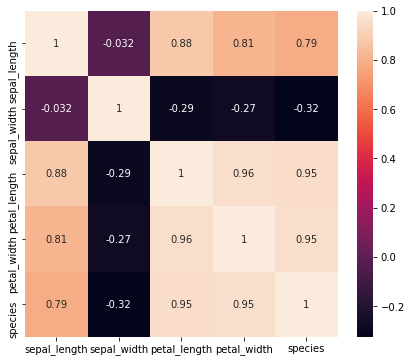

In [158]:
#Before plotting the correlation matrix (heatmap), label encoding the species column
df_iris_cm1 = df_iris.copy(deep=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_iris_cm1['species'] = le.fit_transform(df_iris_cm1['species'])

corr_iris = df_iris_cm1.corr()
fig, ax = plt.subplots(figsize = (7,6))
sns.heatmap(corr_iris, annot = True, ax=ax)

In [159]:
#Correlation of Iris data after cleaning
df_iris_clean.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.043648,0.872313,0.809915
sepal_width,-0.043648,1.000000,-0.331633,-0.274421
petal_length,0.872313,-0.331633,1.000000,0.955259
petal_width,0.809915,-0.274421,0.955259,1.000000


<AxesSubplot:>

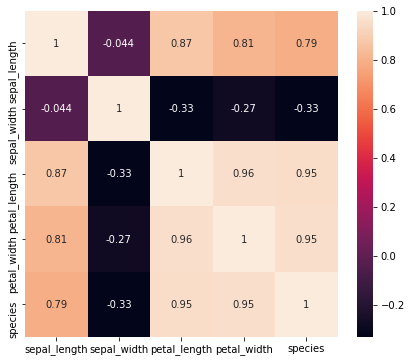

In [160]:
#Before plotting the correlation matrix (heatmap), label encoding the species column
df_iris_cm2 = df_iris_clean.copy(deep=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_iris_cm2['species'] = le.fit_transform(df_iris_cm2['species'])

corr_iris_clean = df_iris_cm2.corr()
fig, ax = plt.subplots(figsize = (7,6))
sns.heatmap(corr_iris_clean, annot = True, ax=ax)

<AxesSubplot:>

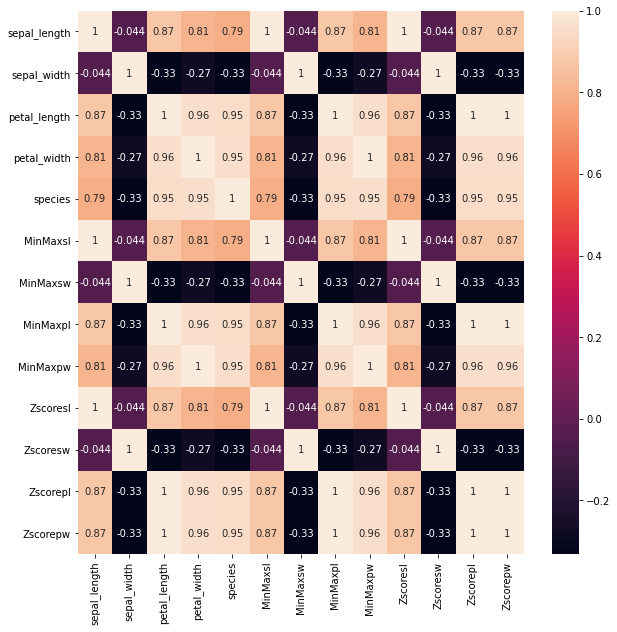

In [161]:
#Correlation of Iris data after Normalization and cleaning
#Before plotting the correlation matrix (heatmap), label encoding the species column
df_iris_cm3 = nzd_iris_data.copy(deep=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_iris_cm3['species'] = le.fit_transform(df_iris_cm3['species'])

corr_iris_clean = df_iris_cm3.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr_iris_clean, annot = True, ax=ax)

In [162]:
rows = []
for column in df_iris_cm2:
     rows.append([column, df_iris_cm2[column].mean(), df_iris_cm2[column].var(), df_iris_cm2[column].skew(), df_iris_cm2[column].kurtosis()])

df_iris_stats = pd.DataFrame(rows, columns=["column","mean", "variance","skew","kurtosis"])
df_iris_stats

,column,mean,variance,skew,kurtosis
0,sepal_length,5.858909,0.742420,0.401506,-0.544820
1,sepal_width,3.056145,0.201906,0.384964,0.565742
2,petal_length,3.807466,3.227641,-0.258061,-1.414701
3,petal_width,1.199708,0.619672,-0.074751,-1.315451
4,species,1.000000,0.673077,0.000000,-1.514563


# Training the Model for Iris Data

In [163]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Species'. 
df_iris_clean['species']= label_encoder.fit_transform(df_iris_clean['species']) 

df_iris_clean['species'].unique()

array([1, 0, 2])

In [164]:
#Splitting the entire dataset for training and testing the model
#train - 0.8; test - 0.2

X = df_iris_clean.drop(['species'], axis = 1)
y = df_iris_clean['species']

In [165]:
X = preprocessing.StandardScaler().fit_transform(X)


In [166]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=98)

In [167]:
knnmodel=KNeighborsClassifier(n_neighbors=5, metric = "minkowski") 

In [168]:
#model training
knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [169]:
y_predict = knnmodel.predict(X_test)

In [170]:
#print the Accuracy metrics
from sklearn.metrics import accuracy_score
acc = "Accuracy: {:3.4%}".format(accuracy_score(y_test,y_predict))
acc

'Accuracy: 100.0000%'

In [171]:
from sklearn.metrics import f1_score
f1Score = "f1 Score: " ,f1_score(y_test, y_predict, average='weighted')
f1Score

('f1 Score: ', 1.0)

In [172]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(y_test.values,y_predict)
confusion_mat

array([[12,  0,  0],
       [ 0,  6,  0],
       [ 0,  0,  3]], dtype=int64)

In [173]:
confusion_mat = pd.DataFrame(data=confusion_mat,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
confusion_mat

,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,6,0
virginica,0,0,3


In [174]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict],index=['y_test','y_predict'])

In [175]:
prediction_output.transpose()

,y_test,y_predict
0,0,0
1,1,1
2,1,1
3,2,2
4,0,0
5,0,0
6,1,1
7,2,2
8,0,0
9,0,0


In [176]:
prediction_output.iloc[0,:].value_counts()

0    12
1     6
2     3
Name: y_test, dtype: int64

In [177]:
print('The accuracy of the Knn classifier on training data is {:.2f}'.format(knnmodel.score(X_train, y_train)))
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knnmodel.score(X_test, y_test)))

The accuracy of the Knn classifier on training data is 0.96
The accuracy of the Knn classifier on test data is 1.00


### Iris Data - Finding the optimum value of K

Text(0.5, 0, 'Number of Neighbors (K)')

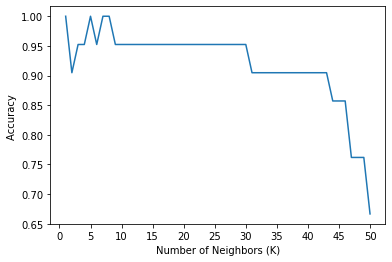

In [178]:
from sklearn.metrics import accuracy_score

a_index=list(range(1,51))
a=pd.Series(dtype = 'float64')
x=[0,5,10,15,20,25,30,35,40,45,50]
for i in list(range(1,51)):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    prediction=neigh.predict(X_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')

### K-Fold validation

Text(0, 0.5, 'Accuracy Rate')

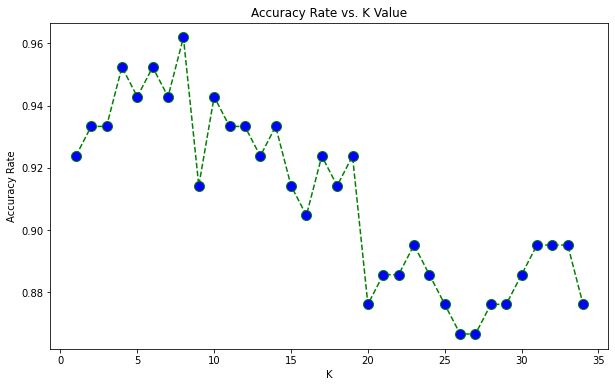

In [179]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

accuracy_rate = []

for i in range(1,35):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=5)
    accuracy_rate.append(score.mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,35),accuracy_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [180]:
#print each cv score (accuracy) and average them
print(score)
print("Accuracy:", score.mean()*100 )

[1.         0.80952381 0.80952381 0.9047619  0.85714286]
Accuracy: 87.6190476190476


In [181]:
print("Variance:", score.var()*100)

Variance: 0.5079365079365078


### Fitting the model on the entire training set and predicting the target on test set using the best found parameter

#### From the above graph, we can see that the maximum accuracy rate during cross validation is obtained at K=8; thus fitting our model for the same.

In [182]:
X = df_iris_clean.drop(['species'], axis = 1)
y = df_iris_clean['species']

In [183]:
X = preprocessing.StandardScaler().fit_transform(X)

In [184]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=98)

In [185]:
knn2model=KNeighborsClassifier(n_neighbors=8, metric = "minkowski") 

In [186]:
#model training
knn2model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [187]:
y_predict = knn2model.predict(X_test)

In [188]:
#print the Accuracy metrics
from sklearn.metrics import accuracy_score
acc = "Accuracy: {:3.4%}".format(accuracy_score(y_test,y_predict))
acc

'Accuracy: 100.0000%'

In [189]:
from sklearn.metrics import f1_score
f1Score = "f1 Score: " ,f1_score(y_test, y_predict, average='weighted')
f1Score

('f1 Score: ', 1.0)

In [190]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(y_test.values,y_predict)
confusion_mat

array([[12,  0,  0],
       [ 0,  6,  0],
       [ 0,  0,  3]], dtype=int64)

In [191]:
confusion_mat = pd.DataFrame(data=confusion_mat,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
confusion_mat

,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,6,0
virginica,0,0,3


In [192]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict],index=['y_test','y_predict'])

In [193]:
prediction_output.transpose()

,y_test,y_predict
0,0,0
1,1,1
2,1,1
3,2,2
4,0,0
5,0,0
6,1,1
7,2,2
8,0,0
9,0,0


In [194]:
prediction_output.iloc[0,:].value_counts()

0    12
1     6
2     3
Name: y_test, dtype: int64

In [195]:
print('The accuracy of the Knn classifier on training data is {:.2f}'.format(knn2model.score(X_train, y_train)))
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn2model.score(X_test, y_test)))

The accuracy of the Knn classifier on training data is 0.95
The accuracy of the Knn classifier on test data is 1.00


# Improved Model

### Weighted KNN - Using Euclidean distance and weights = 'distance'

In [196]:
#importing all the resources for preprocessing and creating pipeline
from sklearn import preprocessing

In [197]:
X3 = df_iris_clean.drop(['species'], axis = 1)
y3 = df_iris_clean['species']
y3.head(1)

0    1
Name: species, dtype: int32

In [198]:
X3 = preprocessing.StandardScaler().fit_transform(X3)


In [199]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=98)

In [200]:
knn3model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean', weights='distance')
knn3model.fit(X_train3,y_train3)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [201]:
y_predict3 = knn3model.predict(X_test3)

In [203]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_test3,y_predict3)
acc2

1.0

In [205]:
from sklearn.metrics import confusion_matrix
conmat2=confusion_matrix(y_test3.values,y_predict3)
conmat2

array([[12,  0,  0],
       [ 0,  6,  0],
       [ 0,  0,  3]], dtype=int64)

The best accuracy was  1.0 with k= 1


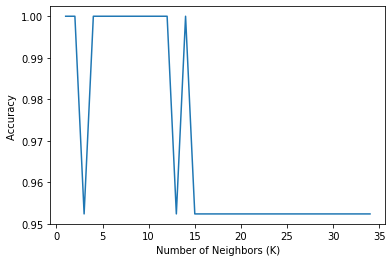

In [209]:
from sklearn.metrics import accuracy_score

c_index=list(range(1,35))
c=pd.Series(dtype = 'float64')
x=[0,5,10,15,20,25,30,35]
for i in list(range(1,35)):
    neigh3=KNeighborsClassifier(n_neighbors=i, metric='euclidean', weights='distance').fit(X_train3,y_train3)
    prediction3=neigh3.predict(X_test3)
    c=c.append(pd.Series(accuracy_score(prediction3,y_test3)))
print( "The best accuracy was ", c.max(), "with k=", c.argmax()+1) 
plt.plot(c_index, c)
plt.xticks(x)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [210]:
#Fitting the weighted KNN (Euclidean distance) model with k=4 
knn4model=KNeighborsClassifier(n_neighbors = 1,metric='euclidean', weights='distance')
knn4model.fit(X3,y3)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='distance')

In [211]:
y_predict_Euclidean = knn4model.predict(X_test3)

In [212]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

acc3 = "Accuracy: {:3.4%}".format(accuracy_score(y_test3,y_predict_Euclidean))
acc3

'Accuracy: 100.0000%'

### Weighted KNN - Using Manhatten distance and weights = 'distance'

In [215]:
knn5model=KNeighborsClassifier(n_neighbors = 5,metric='manhattan', weights='distance')
knn5model.fit(X3,y3)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [216]:
y_predict4 = knn5model.predict(X_test3)

In [217]:
from sklearn.metrics import accuracy_score
acc3 = accuracy_score(y_test3,y_predict4)
acc3

1.0

In [218]:
from sklearn.metrics import confusion_matrix
conmat3=confusion_matrix(y_test3.values,y_predict4)
conmat3

array([[12,  0,  0],
       [ 0,  6,  0],
       [ 0,  0,  3]], dtype=int64)

The best accuracy was  1.0 with k= 5


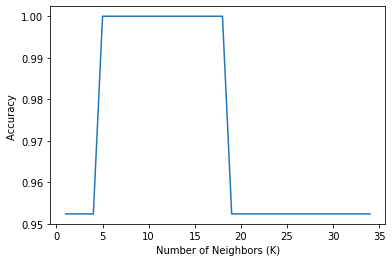

In [219]:
from sklearn.metrics import accuracy_score

d_index=list(range(1,35))
d=pd.Series(dtype = 'float64')
x=[0,5,10,15,20,25,30,35]
for i in list(range(1,35)):
    neigh4=KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='distance').fit(X_train3,y_train3)
    prediction4=neigh4.predict(X_test3)
    d=d.append(pd.Series(accuracy_score(prediction4,y_test3)))
print( "The best accuracy was ", d.max(), "with k=", d.argmax()+1) 
plt.plot(d_index, d)
plt.xticks(x)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [220]:
#Fitting the weighted KNN (Manhattan distance) model with k=5 
knn6model=KNeighborsClassifier(n_neighbors = 5,metric='manhattan', weights='distance')
knn6model.fit(X3,y3)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [221]:
y_predict_Manhattan = knn6model.predict(X_test3)

In [222]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

acc3 = "Accuracy: {:3.4%}".format(accuracy_score(y_test3,y_predict_Manhattan))
acc3

'Accuracy: 100.0000%'

# Using different NN Algorithms

### Ball Tree Algorithm for KNN Model

In [223]:
#Using Ball Tree algorithm in KNN Model
knn7model=KNeighborsClassifier(n_neighbors = 5,metric='minkowski', algorithm = 'ball_tree', weights = 'uniform', p = 1)
knn7model.fit(X3,y3)

KNeighborsClassifier(algorithm='ball_tree', p=1)

In [224]:
y_predict5 = knn7model.predict(X_test3)

In [225]:
from sklearn.metrics import accuracy_score
acc5 = accuracy_score(y_test3,y_predict5)
acc5

0.9523809523809523

In [226]:
from sklearn.metrics import confusion_matrix
conmat4=confusion_matrix(y_test3.values,y_predict5)
conmat4

array([[12,  0,  0],
       [ 0,  6,  0],
       [ 0,  1,  2]], dtype=int64)

The best accuracy was  1.0 with k= 1


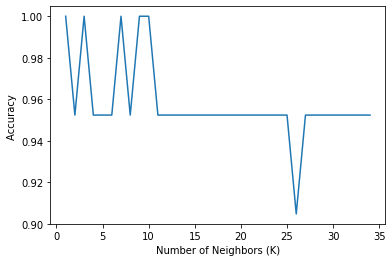

In [228]:
from sklearn.metrics import accuracy_score

e_index=list(range(1,35))
e=pd.Series(dtype = 'float64')
x=[0,5,10,15,20,25,30,35]
for i in list(range(1,35)):
    neigh5=KNeighborsClassifier(n_neighbors=i, metric='minkowski', algorithm = 'ball_tree').fit(X3,y3)
    prediction5=neigh5.predict(X_test3)
    e=e.append(pd.Series(accuracy_score(prediction5,y_test3)))
print( "The best accuracy was ", e.max(), "with k=", e.argmax()+1) 
plt.plot(e_index, e)
plt.xticks(x)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [229]:
#Fitting the weighted KNN (Ball Tree algorithm) model with k=1
knn8model=KNeighborsClassifier(n_neighbors = 1,metric='minkowski', algorithm = 'ball_tree')
knn8model.fit(X3,y3)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [230]:
y_predict_BallTree = knn8model.predict(X_test3)

In [231]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

acc3 = "Accuracy: {:3.4%}".format(accuracy_score(y_test3,y_predict_BallTree))
acc3

'Accuracy: 100.0000%'

### KDTree Algorithm for KNN Model

In [232]:
#Using Kd Tree algorithm in KNN Model
knn9model=KNeighborsClassifier(n_neighbors = 5,metric='minkowski', algorithm = 'kd_tree')
knn9model.fit(X3,y3)

KNeighborsClassifier(algorithm='kd_tree')

In [233]:
y_predict6 = knn9model.predict(X_test3)

In [234]:
from sklearn.metrics import accuracy_score
acc7 = accuracy_score(y_test3,y_predict6)
acc7

0.9523809523809523

In [235]:
from sklearn.metrics import confusion_matrix
conmat5=confusion_matrix(y_test3.values,y_predict6)
conmat5

array([[12,  0,  0],
       [ 0,  6,  0],
       [ 0,  1,  2]], dtype=int64)

The best accuracy was  1.0 with k= 1


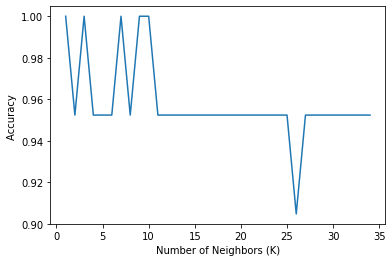

In [236]:
from sklearn.metrics import accuracy_score

f_index=list(range(1,35))
f=pd.Series(dtype = 'float64')
x=[0,5,10,15,20,25,30,35]
for i in list(range(1,35)):
    neigh6=KNeighborsClassifier(n_neighbors=i, metric='minkowski', algorithm = 'kd_tree').fit(X3,y3)
    prediction6=neigh6.predict(X_test3)
    f=f.append(pd.Series(accuracy_score(prediction6,y_test3)))
print( "The best accuracy was ", f.max(), "with k=", f.argmax()+1) 
plt.plot(f_index, f)
plt.xticks(x)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [237]:
#Fitting the weighted KNN (KD Tree algorithm) model with k=1
knn_10model=KNeighborsClassifier(n_neighbors = 1,metric='minkowski', algorithm = 'kd_tree')
knn_10model.fit(X3,y3)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1)

In [238]:
y_predict_KDTree = knn_10model.predict(X_test3)

In [239]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

acc8 = "Accuracy: {:3.4%}".format(accuracy_score(y_test3,y_predict_KDTree))
acc8

'Accuracy: 100.0000%'